# Explore data
This notebook performs a first pass exploration of the data. In particular, this notebook examines the types of interactions that exist between genes

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

np.random.seed(123)

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Input
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

real_expression_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "input",
    "selected_normalized_data.tsv")

shuffled_expression_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "input",
    "shuffled_selected_normalized_data.tsv")

gene_annot_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "annotations",
    "selected_gene_annotations.txt")

In [3]:
# Output directory to store gene ids and correlation outputs
base_intermediate_dir = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "tmp")

In [4]:
# Read data
real_expression = pd.read_csv(
    real_expression_file,
    header=0,
    sep='\t',
    index_col=0)

shuffled_expression = pd.read_csv(
    shuffled_expression_file,
    header=0,
    sep='\t',
    index_col=0)

gene_annot = pd.read_csv(
    gene_annot_file,
    header=0,
    sep='\t',
    index_col=0)

real_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM199982.CEL,0.602146,0.619571,0.453851,0.616299,0.296061,0.193150,0.596934,0.423352,0.500333,0.111480,...,0.143319,0.539570,0.467587,0.334931,0.455701,0.177896,0.399522,0.406659,0.529531,0.408715
GSM199983.CEL,0.565232,0.634272,0.459963,0.639738,0.266436,0.186819,0.644093,0.492162,0.511104,0.096214,...,0.200245,0.466569,0.460400,0.342895,0.423208,0.183716,0.282770,0.372407,0.537280,0.450979
GSM199984.CEL,0.507166,0.679804,0.457609,0.714618,0.335181,0.338886,0.620055,0.540087,0.504405,0.099434,...,0.165607,0.427427,0.422841,0.376656,0.382098,0.330292,0.356257,0.431447,0.559779,0.437137
GSM199985.CEL,0.528545,0.669231,0.462730,0.657953,0.305657,0.282472,0.510688,0.547912,0.479165,0.150961,...,0.232001,0.493364,0.455557,0.353950,0.454050,0.239685,0.379235,0.465572,0.578693,0.444357
GSM199986.CEL,0.542822,0.704964,0.447164,0.649575,0.267066,0.321489,0.441695,0.509655,0.531696,0.135079,...,0.134634,0.479000,0.464972,0.378888,0.396418,0.242533,0.331793,0.403608,0.551968,0.456357


In [5]:
shuffled_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM199982.CEL,0.870682,0.544928,0.259535,0.256576,0.327680,0.156059,0.202151,0.283822,0.435666,0.323549,...,0.528845,0.419061,0.393958,0.156386,0.257788,0.245607,0.290100,0.732332,0.445631,0.468675
GSM199983.CEL,0.283659,0.314760,0.453658,0.382381,0.333102,0.691548,0.772584,0.415558,0.620430,0.117558,...,0.769569,0.592526,0.352250,0.398040,0.297105,0.442982,0.599973,0.560711,0.241373,0.312168
GSM199984.CEL,0.471803,0.144356,0.815250,0.273423,0.342440,0.223515,0.462172,0.404721,0.462780,0.516940,...,0.737197,0.580905,0.273768,0.507767,0.368302,0.203528,0.351906,0.366706,0.205828,0.155930
GSM199985.CEL,0.625107,0.587571,0.235624,0.186327,0.545842,0.145473,0.250523,0.395497,0.480613,0.405998,...,0.422674,0.407691,0.625040,0.355100,0.809820,0.645793,0.434320,0.219170,0.669671,0.333543
GSM199986.CEL,0.521758,0.237703,0.347239,0.649575,0.207933,0.461814,0.293041,0.511183,0.527586,0.084422,...,0.238445,0.230539,0.565509,0.183640,0.798537,0.177051,0.433155,0.107553,0.341844,0.146671


In [6]:
gene_annot.head()

,annotation
PAO1_gene_id,
PA0001,core
PA0002,core
PA0003,core
PA0004,core
PA0005,core


In [7]:
# Group genes by core and accessory annotation
core_gene_ids = list(gene_annot[gene_annot['annotation'] == 'core'].index)
acc_gene_ids = list(gene_annot[gene_annot['annotation'] == 'accessory'].index)

In [8]:
# Pickle gene ids
pickle.dump(core_gene_ids, open(
    os.path.join(
        base_intermediate_dir,
        "core_gene_ids.pickle"),
    "wb"))
pickle.dump(acc_gene_ids, open(
    os.path.join(
        base_intermediate_dir,
        "acc_gene_ids.pickle"),
    "wb"))

# Examine interactions between genes

First we can examine how coordinated groups of genes are: core-core, core-accessory, accessory-accessory 

## Get groups of expression data

In [9]:
# Get core-core gene expression
real_core_expression = real_expression[core_gene_ids]

In [10]:
# Get accessory-accessory gene expression
real_acc_expression = real_expression[acc_gene_ids]

## Calculate correlation between gene profiles

In [11]:
# Get correlation of core-core genes
real_core_corr = real_core_expression.corr(method='pearson')

In [12]:
# Get correlation of accessory-accessory genes
real_acc_corr = real_acc_expression.corr(method='pearson')

In [13]:
# Get correlation of all genes
real_all_corr = real_expression.corr(method='pearson')

# Save 
pickle.dump(real_all_corr, open(
    os.path.join(
        base_intermediate_dir,
        "real_all_corr.pickle"),
    "wb"))

In [14]:
# Get correlation of core-accessory genes
real_core_acc_corr = real_all_corr.loc[core_gene_ids, acc_gene_ids]

In [15]:
# Get correlation of control dataset
shuffled_all_corr = shuffled_expression.corr(method='pearson')

# Save
pickle.dump(shuffled_all_corr, open(
    os.path.join(
        base_intermediate_dir,
        "shuffled_all_corr.pickle"),
    "wb"))

## Plot distribution of correlation scores

In [16]:
# Flatten and get only upper triangle values from correlation matrix
# Core gene correlations
real_core_corr_score = real_core_corr.values[np.triu_indices(n=len(real_core_corr), k=1)]
core_labels = np.repeat(['core'],len(real_core_corr_score))

real_core_corr_df = pd.DataFrame(data={'corr_score': real_core_corr_score,
                                      'group': core_labels})

print(real_core_corr_df.shape)
print('mean ', np.mean(real_core_corr_score))
print('median ', np.median(real_core_corr_score))
print('var ', np.var(real_core_corr_score))
real_core_corr_df.head()

(14297878, 2)
mean  0.010372947759548714
median  0.007456769313635354
var  0.16080468110273968


,corr_score,group
0,0.516128,core
1,0.543192,core
2,0.405760,core
3,0.751646,core
4,0.316448,core


In [17]:
# Flatten and get only upper triangle values from correlation matrix
# Accessory gene correlations
real_acc_corr_score = real_acc_corr.values[np.triu_indices(n=len(real_acc_corr), k=1)]
acc_labels = np.repeat(['accessory'],len(real_acc_corr_score))

real_acc_corr_df = pd.DataFrame(data={'corr_score': real_acc_corr_score,
                                     'group': acc_labels})

print(real_acc_corr_df.shape)
print('mean ', np.mean(real_acc_corr_score))
print('median ', np.median(real_acc_corr_score))
print('var ', np.var(real_acc_corr_score))
real_acc_corr_df.head()

(20100, 2)
mean  0.22947422122214145
median  0.2629636396614491
var  0.164905368969818


,corr_score,group
0,0.466594,accessory
1,0.803976,accessory
2,0.480722,accessory
3,0.065659,accessory
4,-0.086922,accessory


In [18]:
# Flatten and get only upper triangle values from correlation matrix
# Core-accessory gene correlations
real_core_acc_corr_score = real_core_acc_corr.values.flatten().tolist()
core_acc_labels = np.repeat(['core-acc'],len(real_core_acc_corr_score))

real_core_acc_corr_df = pd.DataFrame(data={'corr_score': list(real_core_acc_corr_score),
                                           'group': core_acc_labels})

print(real_core_acc_corr_df.shape)
print('mean ', np.mean(real_core_acc_corr_score))
print('median ', np.median(real_core_acc_corr_score))
print('var ', np.var(real_core_acc_corr_score))
real_core_acc_corr_df.head()

(1074948, 2)
mean  -0.036275637174778844
median  -0.06019519521701732
var  0.151009788562266


,corr_score,group
0,-0.415606,core-acc
1,-0.434026,core-acc
2,-0.345888,core-acc
3,-0.535991,core-acc
4,-0.521372,core-acc


In [19]:
# Flatten and get only upper triangle values from correlation matrix
# All gene correlations
real_all_corr_score = real_all_corr.values[np.triu_indices(n=len(real_all_corr), k=1)]
all_labels = np.repeat(['all'],len(real_all_corr_score))

real_all_corr_df = pd.DataFrame(data={'corr_score': real_all_corr_score,
                                     'group': all_labels})

print(real_all_corr_df.shape)
print('mean ', np.mean(real_all_corr_score))
print('median ', np.median(real_all_corr_score))
print('var ', np.var(real_all_corr_score))
real_all_corr_df.head()

(15392926, 2)
mean  0.007401396575492655
median  0.0028451141581469176
var  0.16033184015966392


,corr_score,group
0,0.516128,all
1,0.543192,all
2,0.405760,all
3,0.751646,all
4,0.316448,all


In [20]:
# Flatten and get only upper triangle values from correlation matrix
# Shuffled gene correlations
shuffled_all_corr_score = shuffled_all_corr.values[np.triu_indices(n=len(shuffled_all_corr), k=1)]
shuffled_all_labels = np.repeat(['shuffled'],len(real_all_corr_score))

shuffled_all_corr_df = pd.DataFrame(data={'corr_score': shuffled_all_corr_score,
                                          'group': shuffled_all_labels})

print(shuffled_all_corr_df.shape)
print('mean ', np.mean(shuffled_all_corr_score))
print('median ', np.median(shuffled_all_corr_score))
print('var ', np.var(shuffled_all_corr_score))
shuffled_all_corr_df.head()

(15392926, 2)
mean  0.0033686780076101638
median  0.0017372827051477507
var  0.026747169005317886


,corr_score,group
0,-0.003605,shuffled
1,-0.300246,shuffled
2,-0.087553,shuffled
3,-0.036613,shuffled
4,-0.020196,shuffled


In [21]:
# Create df
corr_scores_df = pd.concat([real_core_corr_df,
                            real_acc_corr_df,
                            real_core_acc_corr_df,
                            real_all_corr_df,
                            shuffled_all_corr_df],
                           ignore_index=True)

print(corr_scores_df.shape)
corr_scores_df.head()

(46178778, 2)


,corr_score,group
0,0.516128,core
1,0.543192,core
2,0.405760,core
3,0.751646,core
4,0.316448,core


Text(0.5, 1.0, 'Distribution of correlation scores per group')

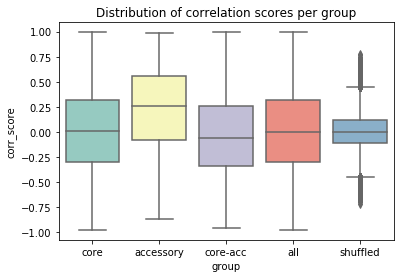

In [22]:
# Plot all correlation scores
sns.boxplot(data=corr_scores_df,
           x='group',
           y='corr_score',
           palette='Set3').set_title('Distribution of correlation scores per group')

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

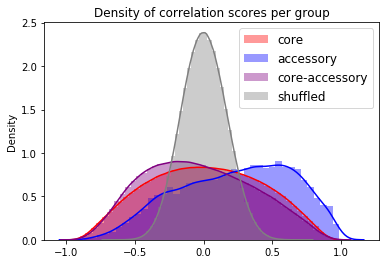

In [23]:
# Distribution plot for core genes
sns.distplot(real_core_corr_score, label='core', color='red')
sns.distplot(real_acc_corr_score, label='accessory', color='blue')
sns.distplot(real_core_acc_corr_score, label='core-accessory', color='purple')
sns.distplot(shuffled_all_corr_score, label='shuffled', color='grey')

plt.legend(prop={'size': 12})
plt.title('Density of correlation scores per group')
plt.ylabel('Density')

**Some sanity checks**
* Shuffled dataset has very little correlation between genes, as expected since we have disrupted the inherent relationships between genes through our permutation process
* Since core genes comprise 97% of the total genes, the mean correlation for all genes is the same as the core gene set

**Other observations**
* The mean correlation of accessory genes only is 0.2295, which is higher compared to the mean correlation of core genes, 0.01037.
* The mean correlation of accessory-core genes is -0.036, which is very slightly lower compared to core-only and accessory only groups.

* Looking at the density plot for the accessory-accessory gene correlation scores, the scores are shifted to the right.
* Looking at the density plot for accessory-core gene correlation scores, the scores are shifted very slightly to the left possibly indicating an antagonistic relationship. Need to read more about what is currently known about core and accessory genes and about negative regulation patterns.
* Looking at the density plot for the core-core gene correlation scores, there is a normal distribution of correlation scores which would imply that a minor proportion of genes are highly positively correlated (i.e. genes in operons) or highly negatively correlated (example?), while the majority of genes are not strongly correlated. Need to read more to determine if this makes sense

## Binarize the correlation matrix to get interactions

In [24]:
# Binarize correlation score to get possible interactions
threshold = 0.9
real_core_edges = real_core_corr>threshold
real_acc_edges = real_acc_corr>threshold
real_core_acc_edges = real_core_acc_corr>threshold
real_all_edges = real_all_corr>threshold
shuffled_all_edges = shuffled_all_corr>threshold

In [25]:
real_core_edges_score = real_core_edges.values[np.triu_indices(n=len(real_core_edges), k=1)]
real_acc_edges_score = real_acc_edges.values[np.triu_indices(n=len(real_acc_edges), k=1)]
real_core_acc_edges_score = real_core_acc_edges.values.flatten().tolist()
real_all_edges_score = real_all_edges.values[np.triu_indices(n=len(real_all_edges), k=1)]
shuffled_all_edges_score = shuffled_all_edges.values[np.triu_indices(n=len(shuffled_all_edges), k=1)]

In [26]:
num_edges_df = pd.DataFrame(data={'group': ['core', 'accessory', 'core-accessory', 'all', 'shuffled'],
                                  'num_edges': [sum(real_core_edges_score),
                                                sum(real_acc_edges_score),
                                                sum(real_core_acc_edges_score),
                                                sum(real_all_edges_score),
                                                sum(shuffled_all_edges_score)],
                                  'percent_edges': [sum(real_core_edges_score)/real_core_corr_df.shape[0],
                                                    sum(real_acc_edges_score)/real_acc_corr_df.shape[0],
                                                    sum(real_core_acc_edges_score)/((real_core_acc_corr.shape[0]
                                                                                    *real_core_acc_corr.shape[1])),
                                                    sum(real_all_edges_score)/real_all_corr_df.shape[0],
                                                    sum(shuffled_all_edges_score)/shuffled_all_corr_df.shape[0]]
                                 })

num_edges_df.head()

,group,num_edges,percent_edges
0,core,17288,0.001209
1,accessory,467,0.023234
2,core-accessory,1332,0.001239
3,all,19087,0.001240
4,shuffled,0,0.000000
